In [1]:
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, ids = load_data('spleen')
pipe = Pipeline(X, config=f"configs/config.ini", verbose=True, col_ids=ids)
plotter = Plotter(pipe)
pipe.run()

PCA: Knee found at 12 components. Using n=12.
KMedoids: Finished clustering for k=2. Score=0.13.
KMedoids: Finished clustering for k=4. Score=0.24.
KMedoids: Best score achieved for k=4 at 0.24.
TTest: Using 300 markers.
TTest: Finished finding markers for cluster 0.
TTest: Finished finding markers for cluster 1.
TTest: Finished finding markers for cluster 2.
TTest: Finished finding markers for cluster 3.
HyperGeom: Finished finding lvl1 types.
HyperGeom: Finished finding lvl2 types.


In [3]:
a = np.zeros(X.shape[0])
a[1:100]=1
a[200:300]=2

In [4]:
pipe.update(a, code=200)

SS SeededKMeans: Found 3 unique labels. Using seeded KMeans.
TTest: Using 300 markers.
TTest: Finished finding markers for cluster 0.
TTest: Finished finding markers for cluster 1.
TTest: Finished finding markers for cluster 2.
HyperGeom: Finished finding lvl1 types.
HyperGeom: Finished finding lvl2 types.


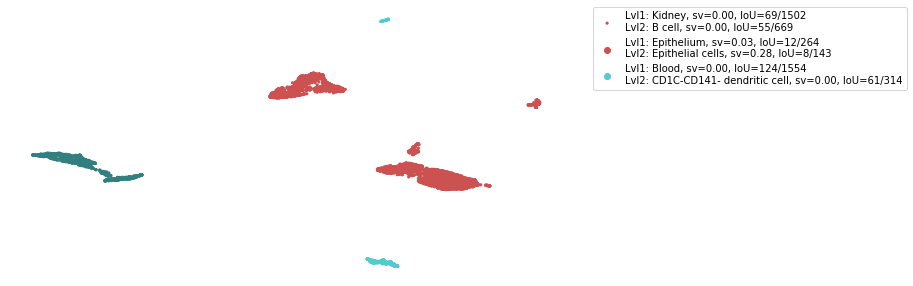

In [5]:
plotter.plot_clu()